In [1]:
import matplotlib.pyplot as plt
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [2]:
def turn_into_rdd_tups(rdd):
    format_rdd = rdd.map(lambda x: tuple(x.replace("(", "").
                                                         replace(")", "").
                                                          split(',')))
    usable_rdd = format_rdd.map(lambda x: (int(x[0]), float(x[1]), float(x[2])))
    met_exceeded = usable_rdd.map(lambda x: (x[0], x[1]))
    nearly_met = usable_rdd.map(lambda x: (x[0], x[2]))
    return met_exceeded, nearly_met

def split_into_years(rdd):
    years = [2015, 2016, 2017, 2018, 2019]
    all_years = []
    for year in years:
        year_rdd = rdd.filter(lambda x: x[0] == year).map(lambda x: x[1]).collect()
        all_years.append(year_rdd)
    
    return all_years

In [3]:
def make_violin_plot(ax, data, years, ylabel, facecolor):
    parts = ax.violinplot(data, years, showmeans = True, showextrema = True)
    for pc in parts['bodies']:
        pc.set_facecolor(facecolor)
        pc.set_edgecolor('black')
        pc.set_alpha(0.4)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_linewidth(.5)

    ax.set_xlabel("Year")
    ax.set_ylabel(ylabel)
    ax.set_xlim([2014.5, 2019.5])
    ax.set_xticks([2015, 2016, 2017, 2018, 2019])

## 5th Grade Results

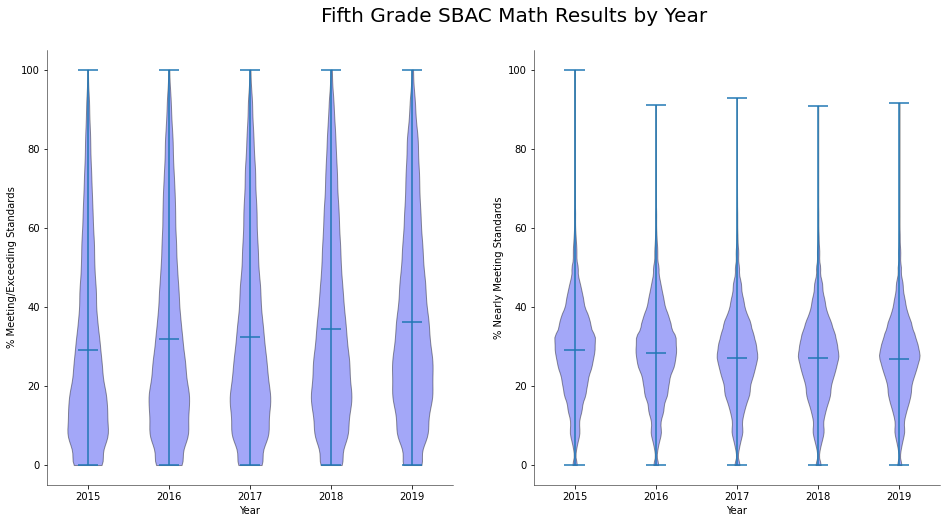

In [5]:
met_exceeded, nearly_met = turn_into_rdd_tups(sc.textFile('Data/fifth-grade.txt'))
met_exceed = split_into_years(met_exceeded)
nearly_met = split_into_years(nearly_met)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.title('Fifth Grade SBAC Math Results by Year', fontsize = 20, y=1.05, x=-0.05)
make_violin_plot(ax1, met_exceed, [2015, 2016, 2017, 2018, 2019], "% Meeting/Exceeding Standards", '#1B24EE')
make_violin_plot(ax2, nearly_met, [2015, 2016, 2017, 2018, 2019], "% Nearly Meeting Standards", '#1B24EE')
plt.savefig("fifth-grade-results")

# 8th Grade Results

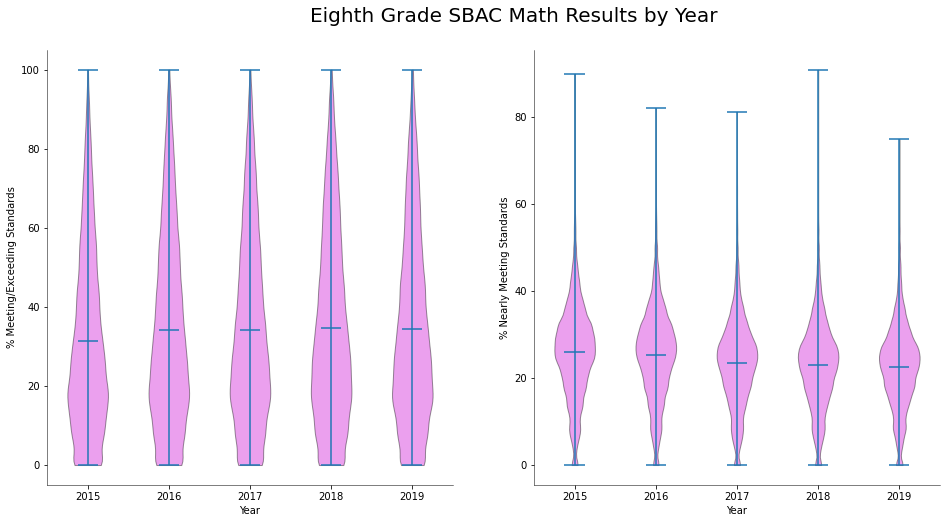

In [6]:
met_exceeded, nearly_met = turn_into_rdd_tups(sc.textFile('Data/eighth-grade.txt'))
met_exceed = split_into_years(met_exceeded)
nearly_met = split_into_years(nearly_met)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.title('Eighth Grade SBAC Math Results by Year', fontsize = 20, y=1.05, x=-0.05)
make_violin_plot(ax1, met_exceed, [2015, 2016, 2017, 2018, 2019], "% Meeting/Exceeding Standards", "#CE13D6")
make_violin_plot(ax2, nearly_met, [2015, 2016, 2017, 2018, 2019], "% Nearly Meeting Standards", "#CE13D6")
plt.savefig("eighth-grade-results")

# 11th Grade Results

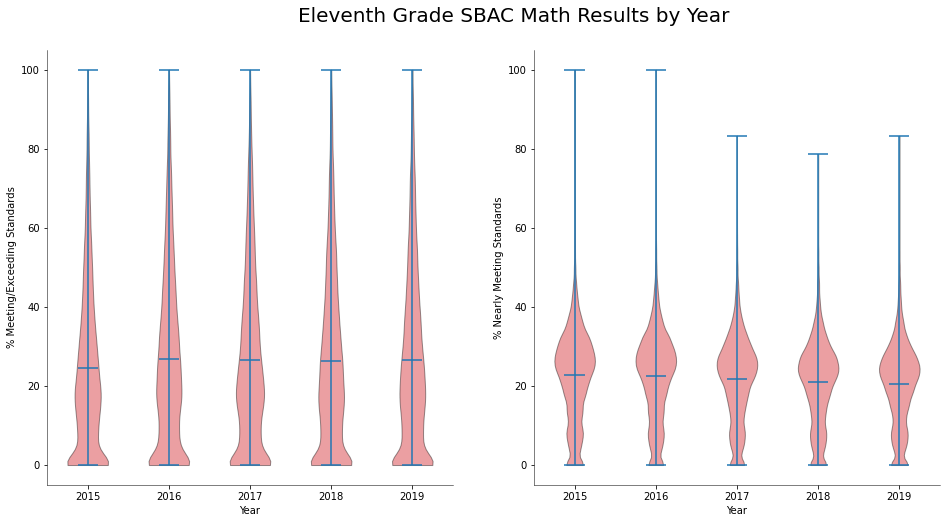

In [7]:
met_exceeded, nearly_met = turn_into_rdd_tups(sc.textFile('Data/eleventh-grade.txt'))
met_exceed = split_into_years(met_exceeded)
nearly_met = split_into_years(nearly_met)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.title('Eleventh Grade SBAC Math Results by Year', fontsize = 20, y=1.05, x=-0.05)
make_violin_plot(ax1, met_exceed, [2015, 2016, 2017, 2018, 2019], "% Meeting/Exceeding Standards", "#CF0F18")
make_violin_plot(ax2, nearly_met, [2015, 2016, 2017, 2018, 2019], "% Nearly Meeting Standards", "#CF0F18")
plt.savefig("eleventh-grade-results")

## Conclusion

The implementation of the smarter balance assessment consortium (SBAC) was only effective with elementary school students (represented by fifth grade), with the other developmental representatives (8th and 11th) essentially stagnating. In determining common core's overall effectiveness with this metric, we can conclude that only students who begin with this curriculum in early childhood has the ability to show competency in their classes.


### Other things to notice:

- Students in the eleventh grade on average performed the worst out of all groups
- Fifth graders proved consistently increase in percentage meeting or exceeding standards per school
- The variance decreased and tend to skew towards the low end as grade level increased
- The average percentage of students who nearly met standards consistently decreased for all 3 focus grades.